In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats

In [2]:
priors_dict ={
    "captive_time": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "div_time": scipy.stats.lognorm(s=0.7, loc=10000, scale=60000),
    "div_time_dom": scipy.stats.lognorm(s=0.5, loc=500, scale=3000),
    "div_time_scot": scipy.stats.lognorm(s=0.3, loc=0, scale=3000),
    "mig_rate_captive": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_rate_scot": scipy.stats.lognorm(s=1, loc=0, scale=0.07),
    "mig_length_scot": scipy.stats.lognorm(s=0.7, loc=0, scale=np.exp(3)),
    "pop_size_captive": scipy.stats.lognorm(s=0.6, loc=0, scale=100),
    "pop_size_domestic_1": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "pop_size_lyb_1": scipy.stats.lognorm(s=1, loc=0, scale=20000),
    "pop_size_lyb_2": scipy.stats.lognorm(s=1.5, loc=5000, scale=100000),
    "pop_size_scot_1": scipy.stats.lognorm(s=1, loc=0, scale=4000),
    "pop_size_eu_1": scipy.stats.lognorm(s=1.3, loc=0, scale=20000),
    "pop_size_eu_2": scipy.stats.lognorm(s=1, loc=0, scale=60000),
    "mutation_rate": scipy.stats.lognorm(s=1, loc=0, scale=1e-8),
    "recombination_rate": scipy.stats.lognorm(s=0.8, loc=0.8e-8, scale=5.5e-9)
}

theta = []
for key, prior in priors_dict.items():
    theta.append(prior.rvs(1000000))
theta = np.concatenate(theta, axis=0)
print(np.shape(theta))
theta = np.reshape(theta, (16,1000000))
print(np.shape(theta))

(16000000,)
(16, 1000000)


In [3]:
params = {
    "captive_time": {"bins" : [120,100], "lims" : [0, 100]},
    "div_time": {"bins" : [300,100], "lims" : [0, 300000]},
    "div_time_dom": {"bins" : [100,100], "lims" : [500, 11000]},
    "div_time_scot": {"bins" : [100,100], "lims" : [1000, 7000]},
    "mig_rate_captive": {"bins" : [300,150], "lims" : [0, 0.4]},
    "mig_rate_scot": {"bins" : [500,50], "lims" : [0, 0.3]},
    "mig_length_scot": {"bins" : [200,100], "lims" : [0, 80]},
    "pop_size_captive": {"bins" : [100,100], "lims" : [0, 500]},
    "pop_size_domestic_1": {"bins" : [700,50], "lims" : [0, 500000]},
    "pop_size_lyb_1": {"bins" : [500,30], "lims" : [0, 100000]},
    "pop_size_lyb_2": {"bins" : [1500,100], "lims" : [0, 750000]},
    "pop_size_scot_1": {"bins" : [400,200], "lims" : [0, 30000]},
    "pop_size_eu_1": {"bins" : [800,800], "lims" : [0, 150000]},
    "pop_size_eu_2": {"bins" : [300,100], "lims" : [0, 250000]},
    "mutation_rate": {"bins" : [200,100], "lims" : [0, 0.6e-7]},
    "recombination_rate": {"bins" : [300,100], "lims" : [0.5e-8, 3.5e-8]}
         }

In [6]:
theta_2 = pd.read_csv("./tr2_jax_big.csv")
theta_2 = theta_2.to_numpy(dtype=np.float32)
np.shape(theta_2)
theta_3 = pd.read_csv("./tr3_jax_big.csv")
theta_3 = theta_3.to_numpy(dtype=np.float32)
np.shape(theta_3)
theta_4 = pd.read_csv("./tr4_jax_big_2.csv")
theta_4 = theta_4.to_numpy(dtype=np.float32)
np.shape(theta_4)

(999943, 16)

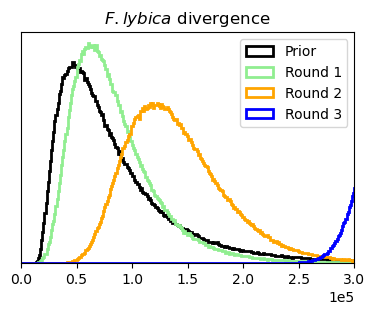

In [7]:
plt.figure(figsize=(4.3,3))
plt.rcParams['axes.formatter.limits'] = [10, 15]
plt.hist(theta[1][0:1000000],
         alpha=1,
         label='Prior', bins=np.arange(0, 400000, 1000), density=True, histtype='step', linewidth=2, color="black")

plt.hist(theta_2[0:1000000, 1],
         alpha=1,
         label='Round 1', bins=np.arange(0, 400000, 1000), density=True, histtype='step', linewidth=2, color="lightgreen")

plt.hist(theta_3[0:1000000, 1],
         alpha=1,
         label='Round 2', bins=np.arange(0, 400000, 1000), density=True, histtype='step', linewidth=2, color="orange")

plt.hist(theta_4[0:999943, 1],
         alpha=1,
         label='Round 3', bins=np.arange(0, 400000, 1000), density=True, histtype='step', linewidth=2, color="blue")

#plt.legend(loc='upper right', bbox_to_anchor=(2, 2), fontsize=20, ncol=3)
plt.legend(loc='upper right')
#plt.title("$\mathregular{T_1}$")
plt.title("$F. lybica$ divergence")
plt.yticks([])
plt.xlim([0, 300000])
plt.show()

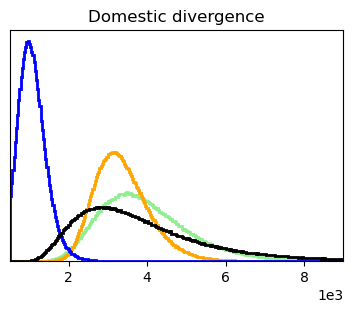

In [8]:
plt.figure(figsize=(4.3,3))
#plt.rcParams['axes.formatter.limits'] = [-2, 10]
plt.hist(theta_2[0:10000000, 2],
         alpha=1,
         label='round_1', bins=np.arange(500, 10000, 30), density=True, histtype='step', linewidth=2, color="lightgreen")

plt.hist(theta_3[0:10000000, 2],
         alpha=1,
         label='round_2', bins=np.arange(500, 10000, 30), density=True, histtype='step', linewidth=2, color="orange")

plt.hist(theta_4[0:10000000, 2],
         alpha=1,
         label='round_3', bins=np.arange(500, 10000, 30), density=True, histtype='step', linewidth=2, color="blue")

plt.hist(theta[2][0:999943],
         alpha=1,
         label='prior', bins=np.arange(500, 10000, 30), density=True, histtype='step', linewidth=2, color="black")


#plt.legend(loc='upper right')
#plt.title("$\mathregular{T_2}$")
plt.title("Domestic divergence")
plt.yticks([])
plt.xlim([500, 9000])
plt.show()

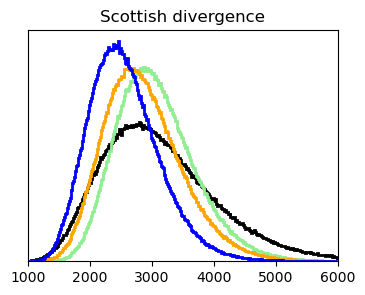

In [20]:
plt.figure(figsize=(4,3))
plt.rcParams['axes.formatter.limits'] = [-2, 100]
plt.hist(theta[3][0:1000000],
         alpha=1,
         label='round_1', bins=np.arange(1000, 6000, 15), density=True, histtype='step', linewidth=2, color="black")

plt.hist(theta_2[0:1000000, 3],
         alpha=1,
         label='round_2', bins=np.arange(1000, 6000, 15), density=True, histtype='step', linewidth=2, color="lightgreen")

plt.hist(theta_3[0:1000000, 3],
         alpha=1,
         label='R2', bins=np.arange(1000, 6000, 15), density=True, histtype='step', linewidth=2,  color="orange")

plt.hist(theta_4[0:1000000, 3],
         alpha=1,
         label='R2', bins=np.arange(1000, 6000, 15), density=True, histtype='step', linewidth=2,  color="blue")

#plt.legend(loc='upper right')
#plt.title("$\mathregular{T_3}$")
plt.title("Scottish divergence")
plt.yticks([])
plt.xlim([1000, 6000])
plt.show()

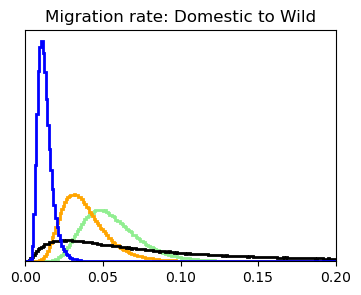

In [35]:
plt.figure(figsize=(4,3))
plt.rcParams['axes.formatter.limits'] = [-2, 10]

plt.hist(theta_2[0:500000, 5],
         alpha=1,
         label='round_2', bins=np.arange(0, 0.4, 0.001), density=True, histtype='step', linewidth=2, color="lightgreen")

plt.hist(theta_3[0:500000, 5],
         alpha=1,
         label='round_2', bins=np.arange(0, 0.4, 0.001), density=True, histtype='step', linewidth=2, color="orange")


plt.hist(theta[5][0:500000],
         alpha=1,
         label='round_1', bins=np.arange(0, 0.4, 0.001), density=True, histtype='step', linewidth=2, color="black")

plt.hist(theta_4[0:500000, 5],
         alpha=1,
         label='round_1', bins=np.arange(0, 0.4, 0.001), density=True, histtype='step', linewidth=2, color="blue")

#plt.legend(loc='upper right')
#plt.title("$\mathregular{M_1}$")
plt.title("Migration rate: Domestic to Wild")
plt.yticks([])
plt.xlim([0, 0.2])
plt.show()

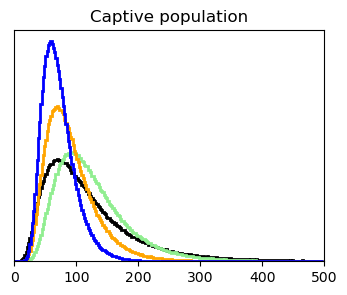

In [38]:
plt.figure(figsize=(4,3))
plt.hist(theta[7][0:700000],
         alpha=1,
         label='round_1', bins=np.arange(0, 500, 2), density=True, histtype='step', linewidth=2, color="black")

plt.hist(theta_2[0:700000, 7],
         alpha=1,
         label='round_2', bins=np.arange(0, 500, 2), density=True, histtype='step', linewidth=2, color="lightgreen")

plt.hist(theta_3[0:1000000, 7],
         alpha=1,
         label='R2', bins=np.arange(0, 500, 2), density=True, histtype='step', linewidth=2, color="orange")

plt.hist(theta_4[0:1000000, 7],
         alpha=1,
         label='R2', bins=np.arange(0, 500, 2), density=True, histtype='step', linewidth=2, color="blue")

#plt.legend(loc='upper right')
#plt.title("$\mathregular{N_1}$")
plt.title("Captive population")
plt.yticks([])
plt.xlim([0, 500])
plt.show()

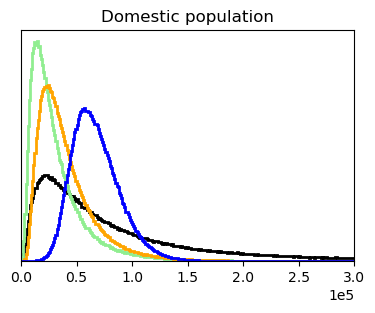

In [39]:
plt.figure(figsize=(4.3,3))
plt.rcParams['axes.formatter.limits'] = [-1, 1]
plt.hist(theta[8][0:700000],
         alpha=1,
         label='round_1', bins=np.arange(0, 500000, 1000), density=True, histtype='step', linewidth=2,color="black")

plt.hist(theta_2[0:700000, 8],
         alpha=1,
         label='round_2', bins=np.arange(0, 500000, 1000), density=True, histtype='step', linewidth=2,color="lightgreen")

plt.hist(theta_3[0:1000000, 8],
         alpha=1,
         label='R2', bins=np.arange(0, 500000, 1000), density=True, histtype='step', linewidth=2,color="orange")

plt.hist(theta_4[0:1000000, 8],
         alpha=1,
         label='R2', bins=np.arange(0, 500000, 1000), density=True, histtype='step', linewidth=2,color="blue")

#plt.legend(loc='upper right')
#plt.title("$\mathregular{N_4}$")
plt.title("Domestic population")
plt.yticks([])
plt.xlim([0, 300000])
plt.show()

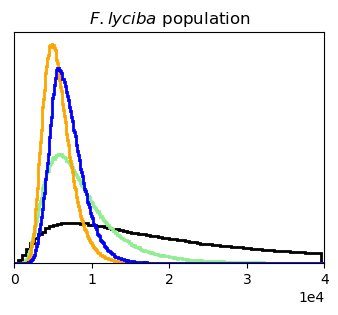

In [40]:
plt.figure(figsize=(4,3))
plt.hist(theta[9][0:700000],
         alpha=1,
         label='round_1', bins=np.arange(0, 40000, 500), density=True, histtype='step', linewidth=2,color="black")

plt.hist(theta_2[0:700000, 9],
         alpha=1,
         label='round_2', bins=np.arange(0, 40000, 100), density=True, histtype='step', linewidth=2,color="lightgreen")

plt.hist(theta_3[0:1000000, 9],
         alpha=1,
         label='R2', bins=np.arange(0, 40000, 100), density=True, histtype='step', linewidth=2,color="orange")

plt.hist(theta_4[0:1000000, 9],
         alpha=1,
         label='R2', bins=np.arange(0, 40000, 100), density=True, histtype='step', linewidth=2,color="blue")

#plt.legend(loc='upper right')
plt.title("$\mathregular{N_5}$")
plt.title("$F. lyciba$ population")
plt.yticks([])
plt.xlim([0, 40000])
plt.show()

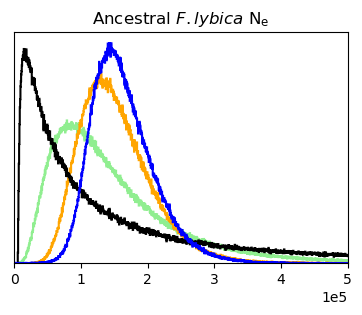

In [42]:
plt.figure(figsize=(4.3,3))

plt.hist(theta_2[0:700000, 10],
         alpha=1,
         label='round_2', bins=np.arange(0, 550000, 500), density=True, histtype='step', linewidth=1.5, color="lightgreen")

plt.hist(theta_3[0:700000, 10],
         alpha=1,
         label='round_2', bins=np.arange(0, 550000, 500), density=True, histtype='step', linewidth=1.5, color="orange")

plt.hist(theta[10][0:700000],
         alpha=1,
         label='round_1', bins=np.arange(0, 550000, 500), density=True, histtype='step', linewidth=1.5, color="black")

plt.hist(theta_4[0:700000, 10],
         alpha=1,
         label='round_2', bins=np.arange(0, 550000, 500), density=True, histtype='step', linewidth=1.5, color="blue")

#plt.legend(loc='upper right')
plt.title("$\mathregular{N_7}$")
plt.title("Ancestral $F. lybica$ $\mathregular{N_e}$")
plt.yticks([])
plt.xlim([0, 500000])
plt.show()

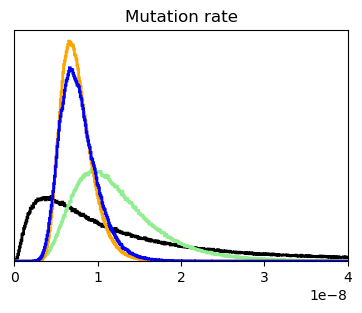

In [45]:
plt.figure(figsize=(4.3,3))
plt.hist(theta[14][0:700000],
         alpha=1,
         label='prior', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='black')

plt.hist(theta_2[0:700000, 14],
         alpha=1,
         label='R1', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='lightgreen')

plt.hist(theta_3[0:1000000, 14],
         alpha=1,
         label='R2', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='orange')

plt.hist(theta_4[0:1000000, 14],
         alpha=1,
         label='R2', bins=np.arange(0, 1e-7, 1e-10), density=True, histtype='step', linewidth=2, color='blue')

#plt.legend(loc='upper right')
#plt.title("m")
plt.title("Mutation rate")
plt.yticks([])
plt.xlim([0, 4e-8])
plt.show()